In [24]:
import sqlite3
import json
import cv2
import numpy as np
import base64

In [4]:
conn = sqlite3.connect('participants.db')
cur = conn.cursor()

livelGKhh:livecAe8A


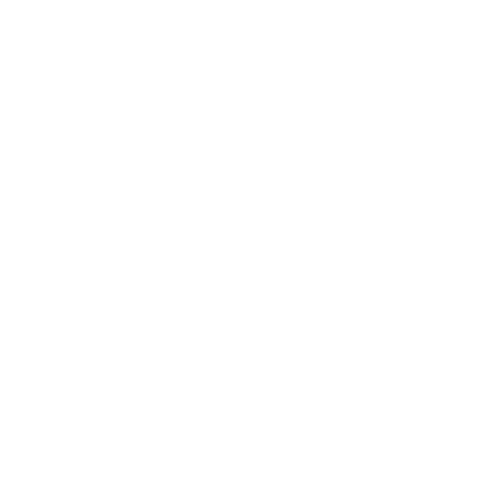

In [26]:
cur.execute('SELECT uniqueid, datastring FROM turkdemo')
for row in cur:
#     print(row[0])
    try:
        container = json.loads(row[1])
        container = container['questiondata']
        if 'user_id' in container:
            id = container['user_id']
            data = container['all_data']
            time = data['time']
            filename = data['filename']
            landmark = data['landmark']
            sketch = data['sketch']
            
            encoded_image = sketch.split(",")[1]
            decoded_image = base64.b64decode(encoded_image)

            arr = np.asarray(bytearray(decoded_image), dtype=np.uint8)
            img = cv2.imdecode(arr, -1) # Load it as it is
            cv2.imwrite(id+'.png', img)
            break
    except:
        pass
    